# Chapter 6: Statistics - Distributions
## 6.1 The binomial distribution

We start with the example of the poutine stand, where we know that 20% of customers order a pork poutine and we want to know the probability that in the next 15 customers, 6 or more will order the pork poutine (we only have enough pork left for 5 poutines and need to know if we should buy more pork)


Prob of exactly 5 pork poutines: 0.103
Prob of 6 or more (sum): 0.061
Prob of 6 or more (sf): 0.061
Prob of 5 or less (sum): 0.939
Prob of 5 or less (cdf): 0.939


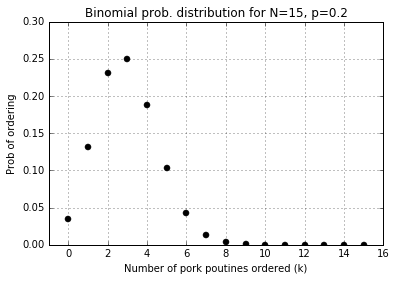

In [18]:
#The binomial distribution
import numpy as np
import pylab as pl
import scipy.stats as stats #for binomial distribution
%matplotlib inline

N=15 # number of customers (trials)
p=0.2 # probability of ordering a pork poutine

print("Prob of exactly 5 pork poutines: {:.3f}".format(stats.binom.pmf(5,N,p)))

#An array to hold all possible outcomes:
allOutcomes=np.arange(0,N+1)
#An array to hold the probabilities corresponding to each outcome:
probOutcomes=stats.binom.pmf(allOutcomes,N,p)

#Can sum the probabilities (or use sf and cdf):
print("Prob of 6 or more (sum): {:.3f}".format(probOutcomes[6:].sum()))
print("Prob of 6 or more (sf): {:.3f}".format(stats.binom.sf(5,N,p)))
print("Prob of 5 or less (sum): {:.3f}".format(probOutcomes[:6].sum()))
print("Prob of 5 or less (cdf): {:.3f}".format(stats.binom.cdf(5,N,p)))

#Make a plot of the probability of each outcome
pl.plot(allOutcomes,probOutcomes,'o',color='black')
pl.xlabel("Number of pork poutines ordered (k)")
pl.ylabel("Prob of ordering")
pl.title("Binomial prob. distribution for N=15, p=0.2")
pl.axis([-1,16,0,0.3])
pl.grid()
pl.show()

We can simulate the number of customers out of 15 that buy pork poutines, to make a fake data set, histogram it, and then compare to the actual binomial distribution:

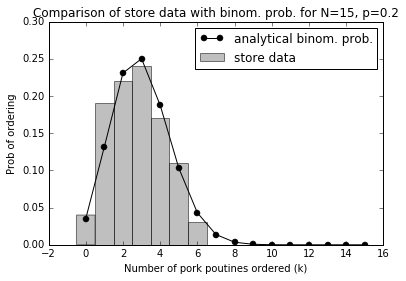

In [2]:
#Simulate nexp experiments of N=15 customers buying pork poutines with probability p=0.2
#Create Table 6.1 and Figure 6.2
nexp=100 #number of experiments
N=15 # number of customers (trials)
p=0.2 # probability of ordering a pork poutine

#Generate nexp results of 15 customers buying pork poutines:
porks=np.random.binomial(N,p,nexp) #these are the number in Table 6.1
#Make integer bin edges for the histogram:
binedges=np.linspace(-0.5,N+0.5,N+2)
pl.hist(porks,bins=binedges,normed=True,color='grey',alpha=0.5,label='store data')
#An array to hold all possible outcomes:
allOutcomes=np.arange(0,N+1)
#An array to hold the probabilities corresponding to each outcome:
probOutcomes=stats.binom.pmf(allOutcomes,N,p)
pl.plot(allOutcomes,probOutcomes,'o-',color='black',label='analytical binom. prob.')
pl.xlabel("Number of pork poutines ordered (k)")
pl.ylabel("Prob of ordering")
pl.title("Comparison of store data with binom. prob. for N=15, p=0.2")
pl.legend()
pl.show()


For example 6-2, we generated a binomially distributed data set for the number of students (k) out 20 (N) that checked their phone. We used a probability of 0.3.

In [3]:
import numpy as np
import pylab as pl

N, p =20, 0.3
xi=np.random.binomial(N,p,15)
print("Number of students checking their phone:",xi)
print("Mean: {:.1f}, variance: {:.1f}".format(xi.mean(),xi.var()))
print("Np: {:.1f}, Np(1-p): {:.1f}".format(N*p,N*p*(1-p)))

Number of students checking their phone: [ 7  6 10  4  6  9  4  4  7  4  7 10  7  6  3]
Mean: 6.3, variance: 4.6
Np: 6.0, Np(1-p): 4.2


For example 6-2, we use the numbers of students that are hard coded in the example

p is 0.303
data mean: 6.1, data variance: 3.4
binom. mean: 6.1, binom. variance: 4.2


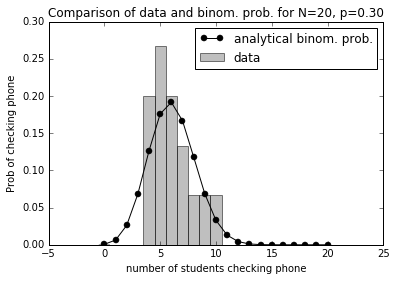

In [4]:
#Example 6-2
import numpy as np
import scipy.stats as stats
import pylab as pl
#N is the number of students
N=20
#put the data into an array, this is the number, k, during each experiment
xi=np.array([8,10,7,6,5,9,5,4,4,5,6,4,5,7,6])
#get the average (mean) value of xi/N, which is our estimate of p
p=np.mean(xi/N)
print("p is {:.3f}".format(p))
#We can now compare the mean and variance of the data with what we expect 
#for the binomial distribution:
print("data mean: {:.1f}, data variance: {:.1f}".format(xi.mean(),xi.var(ddof=1)))
print("binom. mean: {:.1f}, binom. variance: {:.1f}".format(N*p,N*p*(1-p)))

#Let's also compare this using a histogram
binedges=np.linspace(-0.5,N+0.5,N+2)
pl.hist(xi,bins=binedges,normed=True,color='grey',alpha=0.5,label='data')
#An array to hold all possible outcomes:
allOutcomes=np.arange(0,N+1)
#An array to hold the probabilities corresponding to each outcome:
probOutcomes=stats.binom.pmf(allOutcomes,N,p)
pl.plot(allOutcomes,probOutcomes,'o-',color='black',label='analytical binom. prob.')
pl.xlabel("number of students checking phone")
pl.ylabel("Prob of checking phone")
pl.title("Comparison of data and binom. prob. for N={}, p={:.2f}".format(N,p))
pl.legend()
pl.show()


## 6.2 The Poisson distribution
In example 6-3, we calculate the probability of having 15 or more $^{76}$Ge double beta decays in 1 kg of germanium in 1 month:

In [15]:
import numpy as np
import scipy.stats as stats # to use Poisson
from math import * # to use log

#Need the number of Ge atoms in 1 kg of germanium
mGe=72.63 #amu
amu=1.66054e-24 #amu to grams
abundance=0.074
mexp=1000 #total mass of Ge in grams
NGe=abundance*mexp/(amu*mGe)
print("There are {:.2e} 76Ge atoms".format(NGe))

#from half-life, need decay rate
thalf=1.8e21 #half-life in years
lam=log(2)/thalf #lambda, but cannot call it lambda as that is a python keyword
rate=NGe*lam
print("Lambda is {:.2e}".format(lam))
print("The decay rate is {:.1f} per year".format(rate))
print("The decay rate is {:.1f} per month".format(rate/12))

n=rate/12 #The expected number of decays in 1 month

print("The prob. of observing exactly 15 decays in one month is: {:.3f}".format(stats.poisson.pmf(15,n)))
print("The prob. of observing 15 or more decays in one month is: {:.3f}".format(stats.poisson.sf(14,n)))

There are 6.14e+23 76Ge atoms
Lambda is 3.85e-22
The decay rate is 236.3 per year
The decay rate is 19.7 per month
The prob. of observing exactly 15 decays in one month is: 0.056
The prob. of observing 15 or more decays in one month is: 0.883


We can plot the Poisson distribution for different values of the expected number of successes (Figure 6.4 in the text):

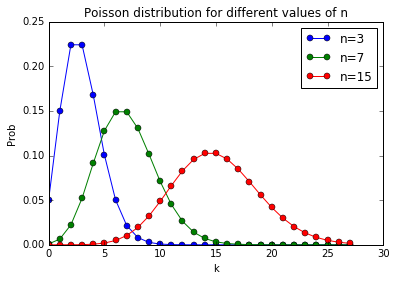

In [6]:
#Figure 6.4
import numpy as np
import scipy.stats as stats # to use Poisson
from math import * # to use log

xi=np.arange(0,28)
pl.plot(xi,stats.poisson.pmf(xi,3),'o-',label='n=3')
pl.plot(xi,stats.poisson.pmf(xi,7),'o-',label='n=7')
pl.plot(xi,stats.poisson.pmf(xi,15),'o-',label='n=15')
pl.xlabel("k")
pl.ylabel("Prob")
pl.title("Poisson distribution for different values of n")
pl.legend()
pl.show()

We can compare the binomial and Poisson distributions for a mean of n=Np=3, and different combinations of N and p. As p gets smaller, the binomial distribution approaches the Poisson distribution (Figure 6.5 in the text):

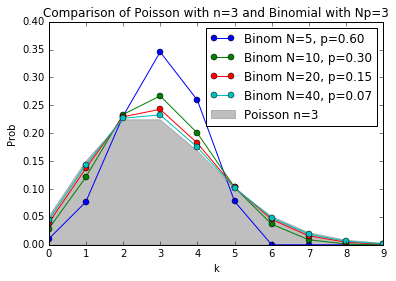

In [7]:
#Figure 6.5
import numpy as np
import scipy.stats as stats # to use Poisson
from math import * # to use log

xi=np.arange(0,10)
Np=3
N=5
pl.plot(xi,stats.binom.pmf(xi,N,Np/N),'o-',label='Binom N={}, p={:.2f}'.format(N,Np/N))
N=10
pl.plot(xi,stats.binom.pmf(xi,N,Np/N),'o-',label='Binom N={}, p={:.2f}'.format(N,Np/N))
N=20
pl.plot(xi,stats.binom.pmf(xi,N,Np/N),'o-',label='Binom N={}, p={:.2f}'.format(N,Np/N))
N=40
pl.plot(xi,stats.binom.pmf(xi,N,Np/N),'o-',label='Binom N={}, p={:.2f}'.format(N,Np/N))
pl.fill_between(xi,stats.poisson.pmf(xi,Np),color='gray', alpha=0.5,label='Poisson n={}'.format(Np))

pl.xlabel("k")
pl.ylabel("Prob")
pl.title("Comparison of Poisson with n=3 and Binomial with Np=3")
pl.legend()
pl.axis([0,9,0,0.4])
pl.show()


In example 6-4, we measured that an average of 10 tourists per week get hit by coconuts. We want to estimate an uncertainty in that number so that we can give a range of tourists that get hit per week. Specifically, we want the range that gives a 90% chance that the number of tourists hits is in that range:

In [8]:
import numpy as np
import scipy.stats as stats # to use Poisson

n=10 # the expected number of coconut hits
#Sum the probabilities on either side of n until we reach 90%
prob=stats.poisson.pmf(n,n)#the probability of getting exactly n
i=0
while(prob<0.9):
    i=i+1
    #add in the probability at n-i and n+i
    prob=prob+stats.poisson.pmf(n-i,n)+stats.poisson.pmf(n+i,n)
    
print("Between {} and {}, the probability is {:.1f}%".format(n-i,n+i,100*prob))


Between 5 and 15, the probability is 92.2%


The time distribution between Poisson events is exponential, this is illustrated below:

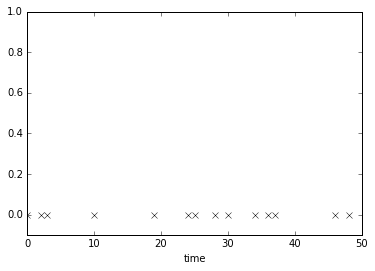

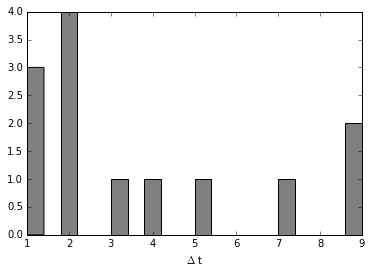

In [11]:
import numpy as np
nt =50 #number of time intervals

n_avg=1 #expected events per time interval (Poisson mean)

#Generate random events for each time interval
n_p = np.random.poisson(n_avg,nt) #events that occur in each interval

#Record time for intervals that have an event:
t_i = []
for i in range(n_p.size):
    if n_p[i] >1:
        t_i.append(i)
  
pl.plot(t_i,np.zeros(len(t_i)),'x',color='black')
pl.axis([0,nt,-0.1,1])
pl.xlabel('time')
pl.show()

tdiff = np.diff(t_i)
pl.hist(tdiff, bins=20, color='gray')
pl.xlabel('$\Delta$ t')
pl.show()

## 6.3 Statistical hypothesis testing

We give a few examples in the text, where we calculate the binomial and Poisson probabilities for certain outcomes based on a null hypothesis. Below are the probabilities for the pill that improves the IQ and the probability that July is a more dangerous month in Ontario:

In [14]:
import scipy.stats as stats
##Pill improving IQ test
#Probability of 10 out of 16 people doing better on IQ test if the probability of doing better is 50%:
print("Prob that 10 out 16 people do a little better:{:.2f}".format(stats.binom.pmf(10,16,0.5)))
print("Prob that at least 10 out 16 people do a little better:{:.2f}".format(stats.binom.sf(9,16,0.5)))
#Probability of 10 out of 16 people doing better on IQ test if the probability of doing better is 16%:
print("Prob that 10 out 16 people do significantly better:{:.6f}".format(stats.binom.pmf(10,16,0.16)))
print("Prob that at least 10 out 16 people do significantly better:{:.6f}".format(stats.binom.sf(9,16,0.16)))

print("-----------")
#Probability of having 61 accidents in a month when we expect 36:
print("Prob of 61 accidents when we expect 36:{:.6f}".format(stats.poisson.pmf(61,36)))
print("Prob of at least 61 accidents when we expect 36:{:.6f}".format(stats.poisson.sf(60,36)))
#Probability of having 61 accidents in a month when we expect 36:
print("Prob of 50 accidents when we expect 42:{:.4f}".format(stats.poisson.pmf(50,42)))
print("Prob of 50 accidents when we expect 42:{:.4f}".format(stats.poisson.sf(49,42)))


Prob that 10 out 16 people do a little better:0.12
Prob that at least 10 out 16 people do a little better:0.23
Prob that 10 out 16 people do significantly better:0.000031
Prob that at least 10 out 16 people do significantly better:0.000034
-----------
Prob of 61 accidents when we expect 36:0.000039
Prob of at least 61 accidents when we expect 36:0.000091
Prob of 50 accidents when we expect 42:0.0275
Prob of 50 accidents when we expect 42:0.1250
